In [1]:
from dendropy import TaxonNamespace, Tree, TreeList
from io import StringIO
from Bio import Phylo
import pandas as pd
import numpy as np
import dendropy
import matplotlib.pyplot as plt

In [2]:
T = 25
xc = 4
xmax = 10
d = [0, 0.004, 0.02]
f = [1.0, 0.4, 0.6]
c = [1, 1, 1]
p = [0, 3, 5]

# Init matrices
sMat = pd.DataFrame(index=range(xmax,-1,-1), columns=range(T),dtype = float)
iMat = pd.DataFrame(index=range(xmax,-1,-1), columns=range(T), dtype =  int)

# Starting Probabilities at t = T
sMat.loc[xmax:xc+1,T-1] = 1.0
sMat.loc[xc:0, T-1] = 0.0
iMat[T-1] = None  



In [8]:
def calcSurvival(x, time, d, f, c, p, xc):
    smax = 0.0
    ch = 0
    if x > xc:
        for i in range(0, 3, 1):
            survFeast = (x-c[i]+p[i])
            if survFeast > xmax:
                survFeast = xmax
            elif survFeast <= 0:
                survFeast = 0
            survStarve = (x-c[i])
            if survStarve > xmax:
                survStarve = xmax
            elif survStarve <= 0:
                survStarve = 0
            s = ((1-d[i])*(f[i])*(sMat.loc[survFeast,time+1]))-((1-d[i])*(1-f[i])*(sMat.loc[survStarve,time+1]))
            if smax < s:
                smax = s
                ch = i + 1
    return smax, ch  

In [ ]:
for i in range(T-2,-1,-1):
    for j in range(xmax,-1, -1):
        smax, ch = calcSurvival(j, i, d, f, c, p, xc)
        sMat.loc[j,i] = smax
        iMat.loc[j,i] = ch

In [ ]:
#sMat

In [ ]:

import seaborn as sns

In [ ]:
sns.heatmap(sMat)

# Lande 1976 Function For Simulating Evolution with A Static Optimum Fitness

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_evolution(pop_size, num_generations, heritability, mut_rate, mean_fitness, sd_fitness, theta, init_mean=0.0):
    # Initialize population
    pop = np.random.normal(loc=init_mean, scale=1.0, size=pop_size)

    # Simulate evolution
    mean_trait = np.zeros(num_generations)
    for gen in range(num_generations):
        # Calculate fitness
        fitness = np.random.normal(loc=mean_fitness, scale=sd_fitness, size=pop_size)
        # Calculate breeding values
        BV = heritability * (pop - theta)
        # Add mutational effects
        mut_effect = np.random.normal(loc=0.0, scale=mut_rate, size=pop_size)
        BV += mut_effect
        # Calculate offspring values
        offspring = np.random.normal(loc=BV + theta, scale=np.sqrt(1-heritability), size=pop_size)
        # Calculate new population
        pop = offspring
        # Store mean trait
        mean_trait[gen] = np.mean(pop)
    
    return mean_trait





In [7]:
# Simulate evolution with multiple starting means

mean_traits = []
for init_mean in init_mean_range:
    mean_trait = simulate_evolution(pop_size, num_generations, heritability, mut_rate, mean_fitness, sd_fitness, theta, init_mean)
    mean_traits.append(mean_trait)

# Plot mean trait over time for each starting mean
for i, init_mean in enumerate(init_mean_range):
    plt.plot(mean_traits[i], label=f"Initial Mean = {init_mean:.2f}")
plt.xlabel('Generation')
plt.ylabel('Mean Trait Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: name 'init_mean_range' is not defined

In [ ]:
def simulate_evolution(pop_size, num_generations, heritability, mut_rate, mean_fitness, sd_fitness, theta, env_range, env_values, reaction_norm_func):
    # Initialize population
    pop = np.random.normal(loc=0.0, scale=1.0, size=pop_size)

    # Simulate evolution
    mean_trait = []
    for gen in range(num_generations):
        # Calculate fitness
        fitness = np.random.normal(loc=mean_fitness, scale=sd_fitness, size=pop_size)
        # Calculate breeding values
        BV = np.zeros(pop_size)
        for i in range(pop_size):
            trait_value = pop[i] + reaction_norm_func(pop[i], env_range, env_values[gen])
            BV[i] = heritability * (trait_value - theta)
        # Add mutational effects
        mut_effect = np.random.normal(loc=0.0, scale=mut_rate, size=pop_size)
        BV += mut_effect
        # Calculate offspring values
        offspring = np.random.normal(loc=BV + theta, scale=np.sqrt(1-heritability), size=pop_size)
        # Calculate new population
        pop = offspring
        # Store mean trait
        mean_trait.append(np.mean(pop))
    
    # Plot mean trait over time
    plt.plot(mean_trait)
    plt.xlabel('Generation')
    plt.ylabel('Mean Trait Value')
    plt.show()


In [ ]:
simulate_evolution(1000, 100, 0.5, 0.02, 0.8, 0.05, 0.5 )

In [15]:
import numpy as np

def ornstein_uhlenbeck(x0, theta, sigma, alpha, T, dt):
    """
    Simulate an Ornstein-Uhlenbeck process.

    Parameters
    ----------
    x0 : float
        Initial value of the process.
    theta : float
        Long-run mean of the process.
    sigma : float
        Volatility of the process.
    alpha : float
        Mean-reversion rate of the process.
    T : float
        Time horizon of the simulation.
    dt : float
        Time step of the simulation.

    Returns
    -------
    x : ndarray, shape (n_steps,)
        Simulated values of the process.

    """
    # Calculate the number of steps in the simulation
    n_steps = int(T/dt)

    # Create an array to store the simulated values
    x = np.zeros(n_steps)

    # Set the initial value
    x[0] = x0

    # Simulate the process using Euler-Maruyama method
    for i in range(1, n_steps):
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=1)
        x[i] = x[i-1] + alpha*(theta - x[i-1])*dt + sigma*dW

    return x


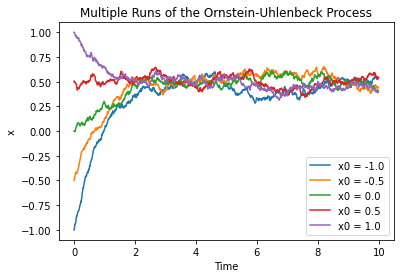

In [16]:
import matplotlib.pyplot as plt

# Define the parameters of the process
theta = 0.5
sigma = 0.1
alpha = 1.0
T = 10
dt = 0.01

# Define the initial values to simulate
x0_list = [-1.0, -0.5, 0.0, 0.5, 1.0]

# Simulate the process for each initial value
for x0 in x0_list:
    x = ornstein_uhlenbeck(x0, theta, sigma, alpha, T, dt)
    plt.plot(np.arange(0, T, dt), x, label=f'x0 = {x0}')

# Plot the results
plt.title('Multiple Runs of the Ornstein-Uhlenbeck Process')
plt.xlabel('Time')
plt.ylabel('x')
plt.legend()
plt.show()


In [13]:
def ornstein_uhlenbeck_dynamic_theta(x0, theta_array, sigma, alpha, T, dt):
    """
    Simulate an Ornstein-Uhlenbeck process with a dynamic ideal phenotype.

    Parameters
    ----------
    x0 : float
        Initial value of the process.
    theta_array : ndarray, shape (n_steps,)
        Array of ideal phenotypes for each time step.
    sigma : float
        Volatility of the process.
    alpha : float
        Mean-reversion rate of the process.
    T : float
        Time horizon of the simulation.
    dt : float
        Time step of the simulation.

    Returns
    -------
    x : ndarray, shape (n_steps,)
        Simulated values of the process.

    """
    # Calculate the number of steps in the simulation
    n_steps = int(T/dt)

    # Create an array to store the simulated values
    x = np.zeros(n_steps)

    # Set the initial value
    x[0] = x0

    # Simulate the process using Euler-Maruyama method
    for i in range(1, n_steps):
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=1)
        theta = theta_array[i-1]
        x[i] = x[i-1] + alpha*(theta - x[i-1])*dt + sigma*dW

    return x


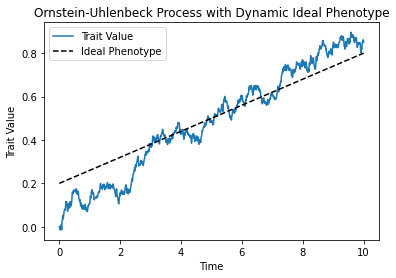

In [14]:
# Set the parameters of the process
x0 = 0
sigma = 0.1
alpha = 1
T = 10
dt = 0.01

# Create an array of ideal phenotypes
n_steps = int(T/dt)
theta_array = np.linspace(0.2, 0.8, n_steps)

# Simulate the process with a dynamic ideal phenotype
x = ornstein_uhlenbeck_dynamic_theta(x0, theta_array, sigma, alpha, T, dt)

# Plot the results
t = np.linspace(0, T, n_steps)
plt.plot(t, x)
plt.plot(t, theta_array, 'k--')
plt.xlabel('Time')
plt.ylabel('Trait Value')
plt.legend(['Trait Value', 'Ideal Phenotype'])
plt.title('Ornstein-Uhlenbeck Process with Dynamic Ideal Phenotype')
plt.show()

In [18]:
def ornstein_uhlenbeck_dynamic_theta(x0, theta_array, sigma, alpha, T, dt, w):
    """
    Simulate an Ornstein-Uhlenbeck process with a dynamic ideal phenotype
    and calculate the fitness value and mean phenotype over time.

    Parameters
    ----------
    x0 : float
        Initial value of the process.
    theta_array : ndarray, shape (n_steps,)
        Array of ideal phenotypes for each time step.
    sigma : float
        Volatility of the process.
    alpha : float
        Mean-reversion rate of the process.
    T : float
        Time horizon of the simulation.
    dt : float
        Time step of the simulation.
    w : float
        Selection strength.

    Returns
    -------
    x : ndarray, shape (n_steps,)
        Simulated values of the process.
    f : ndarray, shape (n_steps,)
        Fitness value at each time step.
    m : ndarray, shape (n_steps,)
        Mean phenotype at each time step.

    """
    # Calculate the number of steps in the simulation
    n_steps = int(T/dt)

    # Create arrays to store the simulated values, fitness values, and mean phenotypes
    x = np.zeros(n_steps)
    f = np.zeros(n_steps)
    m = np.zeros(n_steps)

    # Set the initial values
    x[0] = x0
    m[0] = x0

    # Simulate the process using Euler-Maruyama method
    for i in range(1, n_steps):
        dW = np.random.normal(loc=0, scale=np.sqrt(dt), size=1)
        theta = theta_array[i-1]
        x[i] = x[i-1] + alpha*(theta - x[i-1])*dt + sigma*dW
        f[i] = np.exp(-w*(x[i] - theta)**2)
        m[i] = np.mean(x[0:i+1])

    return x, f, m


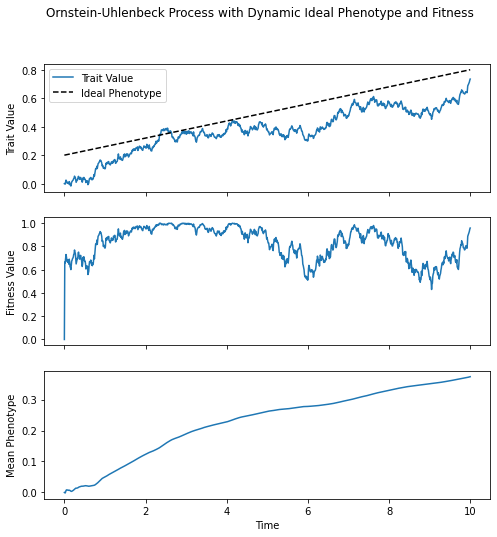

In [20]:

# Set the parameters of the process
x0 = 0
sigma = 0.1
alpha = 1
T = 10
dt = 0.01
w = 10

# Create an array of ideal phenotypes
n_steps = int(T/dt)
theta_array = np.linspace(0.2, 0.8, n_steps)

# Simulate the process with a dynamic ideal phenotype and calculate the fitness value and mean phenotype over time
x, f, m = ornstein_uhlenbeck_dynamic_theta(x0, theta_array, sigma, alpha, T, dt, w)

# Plot the results
t = np.linspace(0, T, n_steps)
fig, axs = plt.subplots(3, sharex=True, figsize=(8, 8))
axs[0].plot(t, x)
axs[0].plot(t, theta_array, 'k--')
axs[0].set_ylabel('Trait Value')
axs[0].legend(['Trait Value', 'Ideal Phenotype'])
axs[1].plot(t, f)
axs[1].set_ylabel('Fitness Value')
axs[2].plot(t, m)
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Mean Phenotype')
plt.suptitle('Ornstein-Uhlenbeck Process with Dynamic Ideal Phenotype and Fitness')
plt.show()

In [37]:
"""
Incroporate a process switch for particle movement from
OU to Brownian depending on whether or not 

Parameters
----------

zBarInit : float
    initial mean phenotype
theta : float
    ideal phenotype (where W is maximzied)
zRange : float
    absolute value of the range of plasticity
tMax : int
    time horizon
dt : float
    time steps
en : ndarray, dtype(float)
    environmental variables for each 

Returns
-------


"""

env = np.linspace(0.0,1.0,num=101)
theta = 0
zBarInit = 10


In [36]:
if zRange < z -theta

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])